# Association Rules : My Phone Database

What is business objective?
    Business objective of this dataset is to check which types of phones have been sold the most

Constraints: Phone Color combinations are limited to 4 combinations

In [1]:
# importing necessary libraries 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings(action = 'ignore')

In [2]:
dataset = pd.read_csv('C:\\Users\\vaibh\\Desktop\\360 Digitmg\\Association\\myphonedata.csv')
dataset.head()

,V1,V2,V3,red,white,green,yellow,orange,blue
0,red,white,green,1,1,1,0,0,0
1,white,orange,NaN,0,1,0,0,1,0
2,white,blue,NaN,0,1,0,0,0,1
3,red,white,orange,1,1,0,0,1,0
4,red,blue,NaN,1,0,0,0,0,1


In [3]:
dataset.shape

(11, 9)

In [5]:
# Checking totaln number of movies in the dataset

all_colors = list(dataset.V1)+list(dataset.V2)+list(dataset.V3)
unique_colors = set(all_colors)
total_unique_colors = len(unique_colors)
unique_colors,total_unique_colors

({'blue', 'green', nan, 'orange', 'red', 'white', 'yellow'}, 7)

There are 6 different movies in the dataset, thus 5 dummy columns should be present (NaN is present in the dataset hence the length of total unique colors is 7)

<AxesSubplot:xlabel='count'>

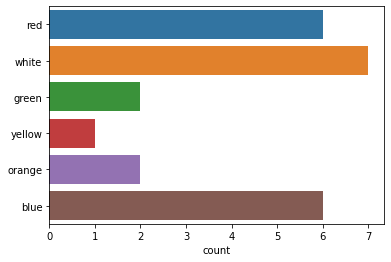

In [6]:
# Barplot of frequency of movies
sns.countplot(y = all_colors)

white is the most sold color of phone followed by blue and red

In [7]:
# Dropping irrelevant features
# Considering only 4 dummy features
dum_data = dataset.iloc[:,4:]
dum_data

,white,green,yellow,orange,blue
0,1,1,0,0,0
1,1,0,0,1,0
2,1,0,0,0,1
3,1,0,0,1,0
4,0,0,0,0,1
5,1,0,0,0,1
6,0,0,0,0,1
7,1,0,0,0,1
8,0,1,0,0,0
9,1,0,0,0,1


In [8]:
# Importing apriori and association rules

from mlxtend.frequent_patterns import apriori,association_rules
frequent_itemsets = apriori(dum_data,min_support = 0.0075,use_colnames = True, max_len = 4)
frequent_itemsets = frequent_itemsets.sort_values('support',ascending = False)
frequent_itemsets

C:\Users\vaibh\AppData\Roaming\Python\Python39\site-packages\mlxtend\frequent_patterns\fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.636364,(white)
4,0.545455,(blue)
7,0.363636,"(white, blue)"
1,0.181818,(green)
3,0.181818,(orange)
6,0.181818,"(white, orange)"
2,0.090909,(yellow)
5,0.090909,"(white, green)"


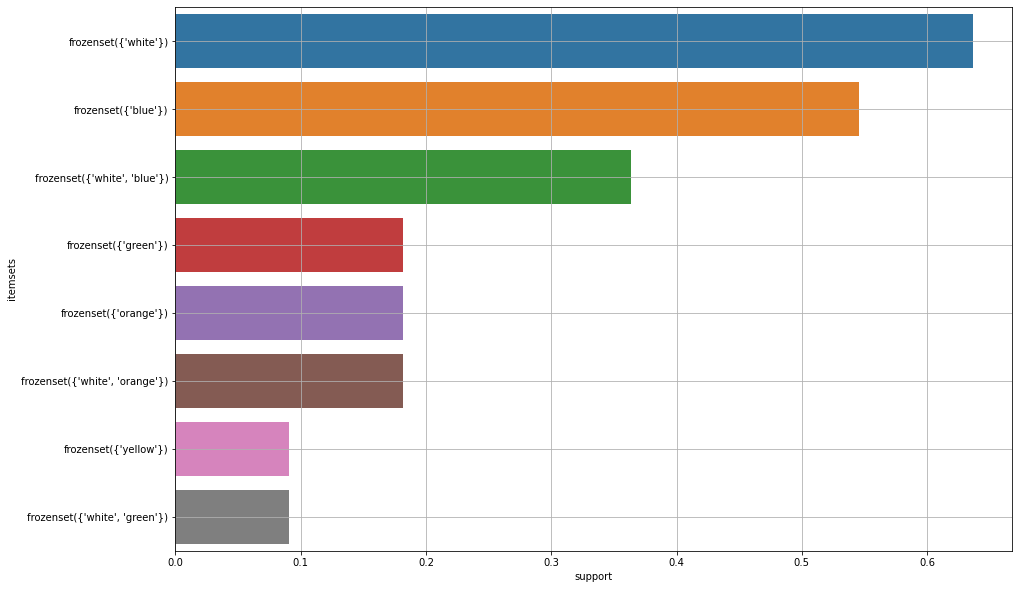

In [9]:
# Barplot of the supports for the itemsets 
plt.figure(figsize=(15,10))
sns.barplot(x = frequent_itemsets['support'],y = frequent_itemsets['itemsets'])
plt.grid()
plt.show()

White alone is the most sold phone color i.e. 64% 

Blue is second most sold phone color i.e. 55%  

In [14]:
# Association rules of the dataset

rules = association_rules(frequent_itemsets, metric = 'lift', min_threshold = 1)
rules = rules.sort_values('lift', ascending=False)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
2,(white),(orange),0.636364,0.181818,0.181818,0.285714,1.571429,0.066116,1.145455
3,(orange),(white),0.181818,0.636364,0.181818,1.000000,1.571429,0.066116,inf
0,(white),(blue),0.636364,0.545455,0.363636,0.571429,1.047619,0.016529,1.060606
1,(blue),(white),0.545455,0.636364,0.363636,0.666667,1.047619,0.016529,1.090909


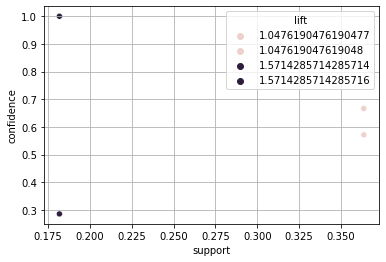

In [11]:
# Scatter plot 
sns.scatterplot(x = rules.support, y = rules.confidence, hue = rules.lift)
plt.grid()

Observations:
1. In the dataset, 4 rules were found using apriori algorithm
3. Lift ratio ranges from 1.04 to 1.5
4. The highest lift ratio corresponds to confidence value of 0.3 and 1 and support value of 0.18